# Imports and data

In [2]:
import pandas as pd
import time
import re 
import progressbar as pb

import jieba
from collections import Counter
import string
from jieba import posseg as pseg
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick

import numpy as np

import math

from PIL import Image
import io

df = pd.read_excel("Dataset for Table_1_2, Fig_4.xlsx")

# Keyword Dicts

Defines the keyword dictionaries that are used to classify topics

In [3]:
keyword_dictionaries = {"Science & Technology": ["科技", "科学", "技术","高新"],
                        "Environment": ["环保", "生态环境", "污染", "环境", "废物"],
                        "Socio-economic policy": ["消费", "就业", "养老", "社会保障", "劳动","劳工","人力资源", "社保",
                                                 "社会"],
                        "Macro-economy & trade": ["经济，金融", "进口", "出口", "贸易", "价格", "商业", "外贸", "商务"],
                        "Research & education": ["教育", "研究院", "研究所", "大学", "科研"],
                        "Healthcare": ["医", "卫生", "药"],
                        "Cadre management & discipline inspection": ["干部", "纪律", "检查", "党内", "党员"],
                        "State-owned resources, projects & bidding": ["采购", "专项", "项目", "公共资源", "国有"],
                        "International affairs": ["国际", "世界", "外国"],
                        "Cyberspace & data": ["网络", "互联网", "数据", "上网", "网上", "信息"]
                       }

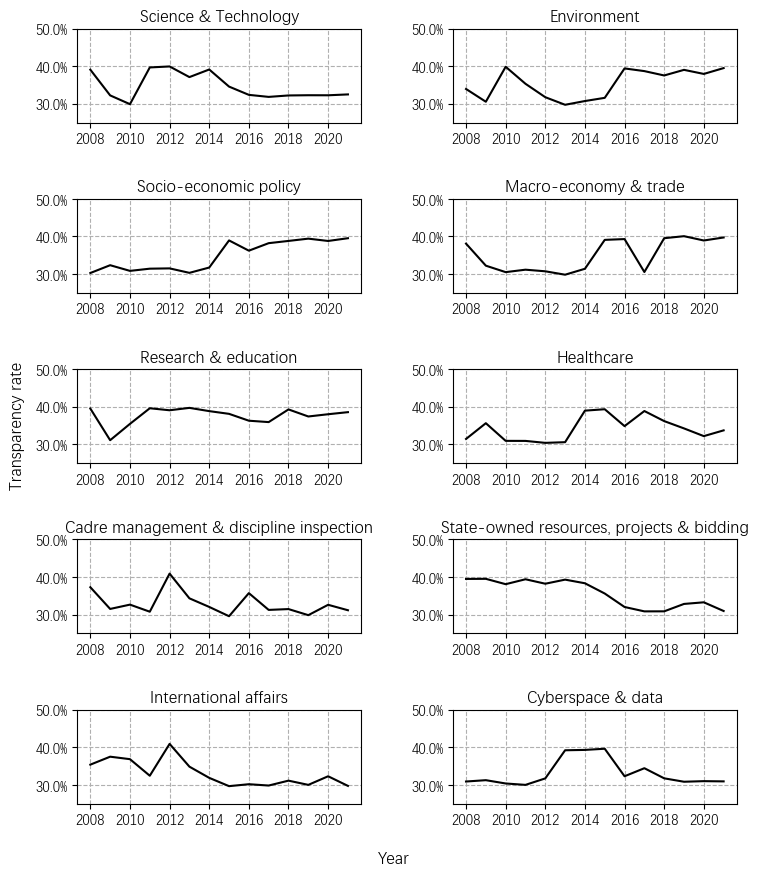

In [4]:

# calculate number of rows necessary for figure
num_rows = math.ceil(len(keyword_dictionaries)/2)

# matplotlib figure styling
plt.style.use("default")
matplotlib.rcParams['font.family'] = ['DengXian']
matplotlib.rcParams['figure.figsize'] = [8, 9]
fig, axs = plt.subplots(num_rows, 2)
fig.tight_layout(pad=3.5)
fig.supxlabel("Year")
fig.supylabel("Transparency rate")

# clean dates to years for easier iteration
df["year"] = df["referral_date"].str[0:4]
df["year"] = df["year"].astype(int)

count = 0
# iterate through each topic
for key, values in keyword_dictionaries.items():
    pct = []
    
    # filter to only the rows that contain any of the keywords from the dictionary 
    mask = df["title"].apply(lambda x: any(value for value in values if value in x))
    df_filtered = df.loc[mask].reset_index(drop=True)
    
    
    for year in range(2008, 2022):
        # for each year, filter to only the rows about that year
        df_filtered_year = df_filtered.loc[df_filtered["year"] == year].reset_index(drop=True)
        # calculate % of docs for which fulltext has been released
        pct_visible = len(df_filtered_year.loc[df["fulltext_released_to_public"] ==True].reset_index(drop=True)) / len(df_filtered_year) * 100
        pct.append(pct_visible)
    
    # plot percentages against year
    data_to_plot = pd.DataFrame({"year": range(2008, 2022), "transparency rate": pct})
    data_to_plot.set_index("year", inplace=True)
    
    # set right column_no
    if count % 2 == 0:
        column_no = 0
    else:
        column_no = 1
        
    row_no = math.floor(count/2)
    
    # plot fig in subplot
    axs[row_no, column_no].plot(data_to_plot[["transparency rate"]], color='black')
    # format y-axis
    axs[row_no, column_no].set_ylim([25, 50])
    axs[row_no, column_no].yaxis.set_major_formatter(mtick.PercentFormatter())
    # set title
    axs[row_no, column_no].set_title(key)
    # format x-axis and set grid
    axs[row_no, column_no].xaxis.set_major_locator(MaxNLocator(integer=True))
    axs[row_no, column_no].grid(linestyle="dashed")
    
    count += 1

plt.savefig('Fig_3.tiff', dpi=1200, format="tiff", pil_kwargs={"compression": "tiff_lzw"})